# Importing neccessary libraries

In [6]:
from xml.etree.ElementTree import parse #This library is required for parsing the XML datafile.
from pandas import DataFrame, Series #Pandas library for performing data analysis & visualization.
%matplotlib inline

# Reading the input XML file of a given patient and obtaining a pointer to it

In [7]:
doc = parse('generated-data\patient-613876.fhir-bundle.xml') #'doc' will point to the file, so that we can traverse through it.
#It can also be inferred as a pointer to the ROOT element of the XML structure.

# Extracting all the encounter dates from the input file

In [8]:
"""
If you have a look at the input file, the format/structure in which the Encounter date is stored, is as follows:
<entry ...>
    <Encounter ...>
    ...
        <period>
            <start value="1997-04-29"/>
            <end .../>
        </period>
    </Encounter>
</entry>
"""
encounter_dates = [] #List to store all the encounter dates
for encounter in doc.findall('.//{http://hl7.org/fhir}Encounter'): #Iterating through all the 'Encounter' child elements in the file
    period = encounter.find('{http://hl7.org/fhir}period') #Finding the 'period' child element in each of the 'Encounter' elements
    start_date = period.find('{http://hl7.org/fhir}start') #Finding the 'start' child element in the 'period' element
    encounter_dates.append(start_date.get('value')) #Collecting all the encounter dates in the above list, by accessing the value attribute of 'start' element

In [9]:
#Converting the list to Pandas DataFrame structure for easy plotting
enc_dates = DataFrame(encounter_dates, columns= ['date'])
#Converting the dates into standard date format
enc_dates.date = enc_dates.date.astype("datetime64")
print enc_dates

         date
0  1997-04-29
1  1998-08-26
2  1998-08-28
3  1999-08-04
4  1999-08-05
5  1999-08-10
6  2002-03-29
7  2002-05-01
8  2002-05-02
9  2002-05-31
10 2002-06-14
11 2002-07-03
12 2002-07-22
13 2002-07-23
14 2002-07-24
15 2003-05-22
16 2003-07-03
17 2003-07-16
18 2003-07-17
19 2003-10-16
20 2003-10-17
21 2003-12-12
22 2004-03-30
23 2004-06-03
24 2004-06-04
25 2005-01-12
26 2008-02-26


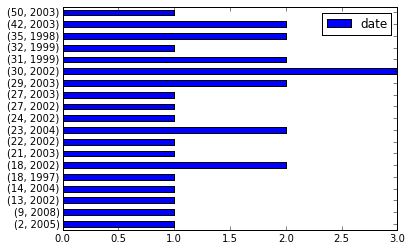

In [10]:
#Here, we first group the encounter dates by year, and then by week
#And then plot a graph to show the result
enc_dates.groupby([enc_dates.date.dt.week, enc_dates.date.dt.year]).count().plot(kind="barh")